In [2]:
I have worked with first 6 million data rows throughout the notebook for train the model. 
In future I will work with the entire dataset for a better prediction of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import pandas as pd
file_path="C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/train.csv"
df = pd.read_csv(file_path,nrows = 6000000)

In [ ]:
The entire test data was loaded into the dataframe.

In [2]:
file_path="C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/test.csv"
df_test = pd.read_csv(file_path)

In [ ]:
Data Cleaning : After some exploration of the data, I proceeded with the below cleaning which for me was 
either noisy data or outliers.

In [2]:
df = df.dropna(how='any',axis=0)

In [3]:
df = df.drop(df[df['fare_amount']<0].index, axis=0)

In [4]:
df = df.drop(df[(df.passenger_count >8) | (df.passenger_count<0)].index, axis=0)

In [5]:
df=df[(df.pickup_latitude > 37) & (df.pickup_latitude < 43) & (df.dropoff_latitude > 37) & (df.dropoff_latitude < 42)]

In [6]:
df=df[(df.pickup_longitude > -75) & (df.pickup_longitude < -72) & (df.dropoff_longitude > -75) & (df.dropoff_longitude < -72)]

In [ ]:
Feature Engineering : My first feature was to find the distance of the trip and map it with the fare amount to
    see the relation.
Here i am finding both the euclidean and haversine distnce(since this will give me a distance in Kilometers)

In [7]:
def euc_distance(pick_lat, pick_lng, drop_lat, drop_lng):
    x = (drop_lat-pick_lat)
    y = (drop_lng - pick_lng)
    return np.sqrt(x*x + y*y)


def hav_distance(pick_lat, pick_lng, drop_lat, drop_lng):
    r=6371
    phi1=np.radians(pick_lat)
    phi2=np.radians(drop_lat)
    delta_phi=np.radians(drop_lat-pick_lat)
    delta_lamda=np.radians(drop_lng-pick_lng)
    
    a=np.sin(delta_phi/2) * np.sin(delta_phi/2) + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lamda/2) * np.sin(delta_lamda/2)
    c= 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d= r*c
    return d

In [8]:
dist=euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
hav_dist=hav_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

In [9]:
df['euclidean_distance']=dist

In [10]:
df['haversine_distance']=hav_dist

In [12]:
dist=euc_distance(df_test['pickup_latitude'], df_test['pickup_longitude'], df_test['dropoff_latitude'], df_test['dropoff_longitude'])
hav_dist=hav_distance(df_test['pickup_latitude'], df_test['pickup_longitude'], df_test['dropoff_latitude'], df_test['dropoff_longitude'])

In [13]:
df_test['euclidean_distance']=dist

In [14]:
df_test['haversine_distance']=hav_dist

In [15]:
data = df[['euclidean_distance','fare_amount']]
correlation = data.corr(method='pearson')

In [16]:
correlation

,euclidean_distance,fare_amount
euclidean_distance,1.000000,0.788939
fare_amount,0.788939,1.000000


In [17]:
df['euclidean_distance'].corr(df['fare_amount'])

0.7889394044259812

In [18]:
df['haversine_distance'].corr(df['fare_amount'])

0.7673598744969463

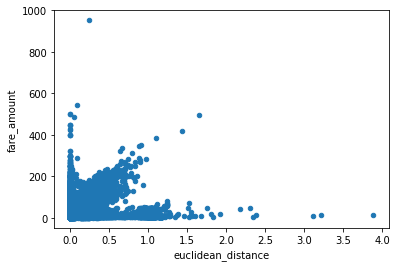

In [19]:
plot=df.plot.scatter('euclidean_distance','fare_amount')

In [ ]:
There is a field given as 'pickup_datetime' which can be used to extract vital information pertaining
to time such as hour of travel,date,day of week,month.So we consider this also as an feature for our model

In [11]:
import math
import re
%timeit
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)

In [12]:
df['date'] = df['pickup_datetime'].dt.day
df['day of week'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

In [22]:
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'],infer_datetime_format=True)

In [23]:
df_test['date'] = df_test['pickup_datetime'].dt.day
df_test['day of week'] = df_test['pickup_datetime'].dt.dayofweek
df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['hour'] = df_test['pickup_datetime'].dt.hour

In [ ]:
Adding another feature 'time' which is basically the hour of travel, converting minutes and seconds to hours.

In [13]:
df['time'] = df['pickup_datetime'].dt.hour + df['pickup_datetime'].dt.minute / 60 + df['pickup_datetime'].dt.second / 3600

In [25]:
df_test['time'] = df_test['pickup_datetime'].dt.hour + df_test['pickup_datetime'].dt.minute / 60 + df_test['pickup_datetime'].dt.second / 3600

In [26]:
df['passenger_count'].corr(df['fare_amount'])

0.014195338705591734

In [28]:
df['date'].corr(df['fare_amount'])

0.0011056097487743607

In [29]:
df['day of week'].corr(df['fare_amount'])

0.003202795033869248

In [30]:
df['hour'].corr(df['fare_amount'])

-0.017178549184209645

In [31]:
df['time'].corr(df['fare_amount'])

-0.017489868803411697

In [32]:
df['time'].corr(df['euclidean_distance'])

-0.026314877505206082

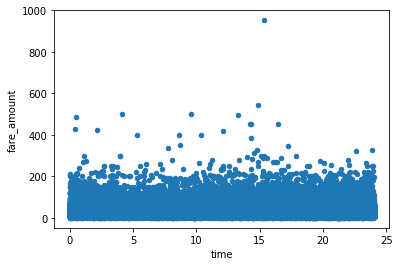

In [33]:
plot=df.plot.scatter('time','fare_amount')

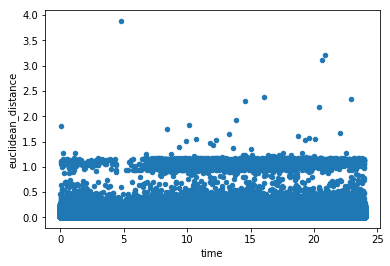

In [34]:
plot=df.plot.scatter('time','euclidean_distance')

In [35]:
def manhattan_distance(pick_lat, pick_lng, drop_lat, drop_lng):
    x = np.abs(drop_lat-pick_lat)
    y = np.abs(drop_lng - pick_lng)
    return (x + y)

In [36]:
df['manhattan_distance']=manhattan_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

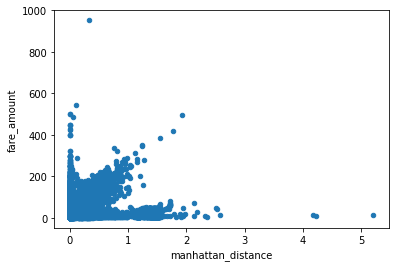

In [37]:
plot=df.plot.scatter('manhattan_distance','fare_amount')

In [38]:
df['manhattan_distance'].corr(df['fare_amount'])

0.7845878802877175

In [ ]:
loc=df[['fare_amount','jfk_dropoff','jfk_pickup','lga_pickup','lga_dropoff']].copy()
sns.pairplot(loc)

In [39]:
df_test['manhattan_distance']=manhattan_distance(df_test['pickup_latitude'], df_test['pickup_longitude'], df_test['dropoff_latitude'], df_test['dropoff_longitude'])

In [40]:
df = df.drop(df[(df['haversine_distance']==0)&(df['fare_amount']==0)].index, axis = 0)

In [41]:
df.loc[(df['haversine_distance']!=0) & (df['fare_amount']==0)].count()

key                   111
fare_amount           111
pickup_datetime       111
pickup_longitude      111
pickup_latitude       111
dropoff_longitude     111
dropoff_latitude      111
passenger_count       111
euclidean_distance    111
haversine_distance    111
date                  111
day of week           111
year                  111
month                 111
hour                  111
time                  111
manhattan_distance    111
dtype: int64

In [42]:
df.loc[(df['haversine_distance']!=0) & (df['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,haversine_distance,date,day of week,year,month,hour,time,manhattan_distance
10002,2010-02-15 14:26:01.0000003,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1,0.031156,3.184763,15,0,2010,2,14,14.433611,0.043644
27891,2015-05-15 21:40:28.00000010,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1,0.000011,0.001064,15,4,2015,5,21,21.674444,0.000015
47302,2010-03-18 19:13:39.0000002,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1,0.000182,0.018420,18,3,2010,3,19,19.227500,0.000257
175352,2014-06-29 16:04:29.0000002,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2,0.000087,0.009244,29,6,2014,6,16,16.074722,0.000116
211455,2015-04-15 14:02:39.0000003,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1,0.000069,0.005783,15,2,2015,4,14,14.044167,0.000069
211499,2010-03-08 18:22:00.00000076,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1,0.000006,0.000537,8,0,2010,3,18,18.366667,0.000008
266485,2010-02-20 09:51:27.0000004,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1,0.000036,0.003506,20,5,2010,2,9,9.857500,0.000051
386734,2015-05-08 07:02:38.0000001,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1,0.005138,0.526370,8,4,2015,5,7,7.043889,0.007187
431819,2015-01-13 00:48:21.0000001,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1,0.034444,2.999630,13,1,2015,1,0,0.805833,0.043301
489767,2015-02-14 21:06:53.0000007,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2,0.000009,0.000770,14,5,2015,2,21,21.114722,0.000011


In [44]:
impute1=df.loc[(df['haversine_distance']!=0) & (df['fare_amount']==0)]

In [45]:
impute1['fare_amount'] = impute1.apply(lambda row: ((row['haversine_distance'] * 1.5534) + 2.50), axis=1)

C:\Users\SHREYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df.update(impute1)

In [47]:
impute2=df.loc[(df['haversine_distance']==0) & (df['fare_amount']>3)]

In [48]:
impute2['haversine_distance'] = impute2.apply(lambda row: ((row['fare_amount'] -2.5)/1.5534), axis=1)

C:\Users\SHREYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df.update(impute2)

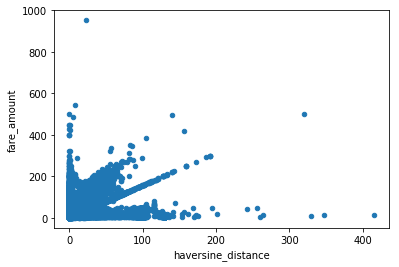

In [50]:
plot=df.plot.scatter('haversine_distance','fare_amount')

In [51]:
df=df.drop(['key'],axis=1)

In [52]:
df=df.drop(['pickup_datetime'],axis=1)

In [53]:
df_test=df_test.drop(['key'],axis=1)

In [54]:
df_test=df_test.drop(['pickup_datetime'],axis=1)

In [57]:
x_df = df.iloc[:,df.columns!='fare_amount']
y_df = df['fare_amount'].values

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm=LinearRegression()
lm.fit(x_df, y_df)
lm.predict=lm.predict(df_test)

In [59]:
sample = pd.read_csv("C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/sample_submission.csv")
sample['fare_amount']= lm.predict
sample.to_csv('C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/submission_10.csv', index=False)

In [ ]:
Next we calculate the airport trips, or trips made in the vicinity of airport as a new feature for the model.

In [11]:
jfk = (-73.7781, 40.6413)
ewr = (-74.175,40.69)
lga = (-73.87, 40.77)

def nyc_pl_dist(coord):
    df['jfk_dropoff'] = (hav_distance(df['dropoff_latitude'], df['dropoff_longitude'], coord[1], coord[0]))
    df['jfk_pickup'] = (hav_distance(coord[1], coord[0],df['pickup_latitude'], df['pickup_longitude']))
    df['ewr_dropoff'] = (hav_distance(df['dropoff_latitude'], df['dropoff_longitude'], coord[1], coord[0]))
    df['ewr_pickup'] = (hav_distance(coord[1], coord[0],df['pickup_latitude'], df['pickup_longitude']))
    df['lga_dropoff'] = (hav_distance(df['dropoff_latitude'], df['dropoff_longitude'], coord[1], coord[0]))
    df['lga_pickup'] = (hav_distance(coord[1], coord[0],df['pickup_latitude'], df['pickup_longitude']))
    #idx.plot('haversine_distance','fare_amount')
    

nyc_pl_dist(jfk)
nyc_pl_dist(ewr)
nyc_pl_dist(lga)

In [61]:
jfk = (-73.7781, 40.6413)
ewr = (-74.175,40.69)
lga = (-73.87, 40.77)

def nyc_pl_dist(coord):
    df_test['jfk_dropoff'] = (hav_distance(df_test['dropoff_latitude'], df_test['dropoff_longitude'], coord[1], coord[0]))
    df_test['jfk_pickup'] = (hav_distance(coord[1], coord[0],df_test['pickup_latitude'], df_test['pickup_longitude']))
    df_test['ewr_dropoff'] = (hav_distance(df_test['dropoff_latitude'], df_test['dropoff_longitude'], coord[1], coord[0]))
    df_test['ewr_pickup'] = (hav_distance(coord[1], coord[0],df_test['pickup_latitude'], df_test['pickup_longitude']))
    df_test['lga_dropoff'] = (hav_distance(df_test['dropoff_latitude'], df_test['dropoff_longitude'], coord[1], coord[0]))
    df_test['lga_pickup'] = (hav_distance(coord[1], coord[0],df_test['pickup_latitude'], df_test['pickup_longitude']))
    #idx.plot('haversine_distance','fare_amount')
    

nyc_pl_dist(jfk)
nyc_pl_dist(ewr)
nyc_pl_dist(lga)

In [ ]:
df[['jfk_pickup']] = df[['jfk_pickup']].apply(lambda value:np.add(df['jfk_pickup'], df['jfk_dropoff']))

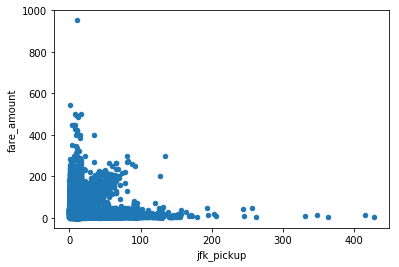

In [62]:
plot=df.plot.scatter('jfk_pickup','fare_amount')

In [65]:
x_df = df.iloc[:,df.columns!='fare_amount']
y_df = df['fare_amount'].values

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lm=LinearRegression()
lm.fit(x_df, y_df)
lm.predict=lm.predict(df_test)

In [68]:
sample = pd.read_csv("C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/sample_submission.csv")
sample['fare_amount']= lm.predict
sample.to_csv('C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/submission_20.csv', index=False)

In [ ]:
from sklearn.feature_selection import SelectKBest
feature_importances = pd.DataFrame({'feature': x_df,
                                        'importance': lm.feature_importances_}).\
                           sort_values('importance', ascending = False).set_index('feature')

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_df, y_df)
rf_predict = rf.predict(df_test)

In [71]:
sample = pd.read_csv("C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/sample_submission.csv")
sample['fare_amount']= rf_predict
sample.to_csv('C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/submission_30.csv', index=False)

In [72]:
from sklearn.feature_selection import SelectKBest
feature_importances = pd.DataFrame({'feature': x_df,
                                        'importance': rf.feature_importances_}).\
                           sort_values('importance', ascending = False).set_index('feature')

In [73]:
feature_importances

,importance
feature,
"(h, a, v, e, r, s, i, n, e, _, d, i, s, t, a, n, c, e)",0.642304
"(e, u, c, l, i, d, e, a, n, _, d, i, s, t, a, n, c, e)",0.158803
"(y, e, a, r)",0.025197
"(d, r, o, p, o, f, f, _, l, o, n, g, i, t, u, d, e)",0.023472
"(d, r, o, p, o, f, f, _, l, a, t, i, t, u, d, e)",0.017666
"(t, i, m, e)",0.015728
"(l, g, a, _, d, r, o, p, o, f, f)",0.014597
"(p, i, c, k, u, p, _, l, a, t, i, t, u, d, e)",0.013348
"(m, a, n, h, a, t, t, a, n, _, d, i, s, t, a, n, c, e)",0.013094


In [74]:
weather=pd.read_csv("C:/Users/SHREYA/Desktop/Fall_SEM/DSF/all/weather_train.csv",nrows=6000000)

In [77]:
weather.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT05,WT02,WT11,WT22,WT04,WT13,WT16,WT08,WT18,WT19
0,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20090101,0,0,0,-33,-94,50,300,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00094728,NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US,20090102,0,0,0,11,-50,28,230,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,1,-9999


In [82]:
weather['DATE'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)

In [83]:
weather['year'] = weather['DATE'].dt.year
weather['month'] = weather['DATE'].dt.month
weather['day of week'] = weather['DATE'].dt.day

In [86]:
df = pd.merge(df, weather, how='left', on=['year','month'])

In [87]:
test

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,euclidean_distance,haversine_distance,date,day of week,...,WT02,WT11,WT22,WT04,WT13,WT16,WT08,WT18,WT19,day
0,4.5,-73.844311,40.721319,-73.84161,40.712278,1.0,0.009436,1.030764,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = df.dropna(how='any',axis=0)

In [ ]:
test.head(1)

In [ ]:
plot=df.plot.scatter('SNOW','fare_amount')

In [ ]:
df['SNOW'].corr(df['fare_amount'])